# ------------    Plotly and cufflinks    ------------

In [1]:
# import libraries
import numpy as np
import pandas as pd
import cufflinks as cf

# shows figures in ipynb
%matplotlib inline

# To remove 'warnings' use 'filterwarnings'
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# check plotly version
import plotly
print(plotly.__version__)   # version > 1.9.4 required

___

## --------    Test Plotly    --------

In [1]:
# test plotly: Makes an "HTML" file
    # The HTML file will embed Plotly.js (so the HTML will be havier, > 4.5mb)
    # However, we can use 'cdn' to imbed Plotly.js, makes the HTML much light-weight
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.write_html('first_figure.html', auto_open=True)

In [ ]:
# plotly.offline, Standalone HTML:
    # Offline mode will save an HTML file locally and open it inside your web browser.

import plotly
print(plotly.__version__) # version > 1.9.4 required

from plotly.graph_objs import Scatter, Layout 

plotly.offline.plot({
    "data": [
        Scatter(x=[1, 2, 3, 4], y=[4, 1, 3, 7])
    ],
    "layout": Layout(
        title="hello world"
    )
})

___

## --------    Show pltly figures in jypyter nb    --------

#### Use plotly in ipynb: render through Plotly.js but not saved to notebook (not recomended)
    # ERR: Mime type rendering requires nbformat>=4.2.0 but it is not installed
    # pip install --upgrade nbformat

In [ ]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

#### another way to see it in notebook (not recomended)

In [ ]:
# use offline version
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

In [ ]:
df = pd.DataFrame(np.random.randn(100,4),columns='A B C D'.split())
df.head()

In [ ]:
# show plotly in notebook
df.iplot(kind='scatter',x='A',y='B',mode='markers',size=10)

___

## --------    use 'cdn' or 'plotly-2.35.2.min.js in working directory'    --------
    # The HTML file's large size is primarily due to the embedded Plotly.js.
    # To reduce the size, we can use 'cdn' to load Plotly.js externally.
    # Alternatively, we can download "Plotly.js" to our working directory and reference it locally.

In [ ]:
# using 'cdn'
import plotly.io as pio
import plotly.express as px

fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
pio.write_html(fig, 'plot_cdn.html', include_plotlyjs='cdn')

### Best way

In [ ]:
# using local "Plotly.js"
import plotly.io as pio
import plotly.express as px

fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
pio.write_html(fig, 'plot_local_plotly_js.html', include_plotlyjs='.\plotly-2.35.2.min.js')

___

# ------------    plotly plots    ------------

#### Plotly functions to create different types of plots  
#### Example Plotly functions for various visualizations:  
    # 1. go.Scatter: For line plots, scatter plots  
    # 2. go.Bar: For bar plots  
    # 3. go.Pie: For pie charts  
    # 4. go.Box: For box plots  
    # 5. go.Histogram: For histograms  
    # 6. go.Heatmap: For heatmaps  
    # 7. go.Surface: For 3D surface plots  

    # You can explore and customize each plot by adding traces and updating layouts. 
    
    # Example:  
    import plotly.graph_objects as go

    # Line plot example
    fig = go.Figure(data=go.Scatter(x=["A", "B", "C"], y=[10, 20, 30]))
    fig.show()


#### Let's create 2 dataframes

In [2]:
# df1: normal distribution of 100 rows and 4 columns
df1 = pd.DataFrame(np.random.randn(100, 4), columns='A B C D'.split())
df1.head()

,A,B,C,D
0,0.386995,0.923637,-1.107738,-1.336041
1,0.502085,2.133397,0.621727,-0.334473
2,0.166884,0.173841,-0.082749,0.574993
3,1.718360,1.811457,-0.528618,-1.600600
4,-0.115635,0.082982,-1.408925,0.019720


In [4]:
# df2: used categorical data, notice dictionary style
df2 = pd.DataFrame({'Category':['A', 'B', 'C'], 'val':[32, 43, 50]})
df2

,Category,val
0,A,32
1,B,43
2,C,50


### lets plot using malpotlib

<AxesSubplot:>

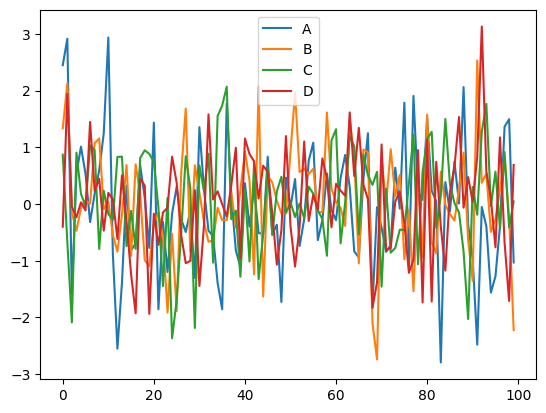

In [5]:
df1.plot()

## ----  Plot using Plotly & iplot  ----
#### we'll use this method, since it's much easier and aligned to pandas plot()

In [6]:
# plot using plotly
import plotly.io as pio
from plotly.offline import iplot

# Generate the plot
fig2 = df1.iplot(asFigure=True)
# The asFigure=True parameter is used in Cufflinks' iplot() function to ensure 
    # that it returns a Plotly Figure object instead of rendering the plot directly in the notebook.
    # Instead of rendering the plot, iplot() returns a Plotly Figure object.
    # This allows you to manipulate, save, or customize the figure further before displaying or exporting it.
# By Default When you call iplot() without asFigure=True, it immediately renders the plot in the notebook.

# Save the plot as an HTML file using a local Plotly.js file
pio.write_html(fig2, 'plotly_fig2.html', include_plotlyjs='./plotly-2.35.2.min.js')

#### lets see an alternative way to plot without using iplot()

In [ ]:
# alternative: plotly.offline.plot()
from plotly.offline import plot
import plotly.graph_objects as go

# Create a simple figure
fig3 = go.Figure(data=go.Scatter(x=df1.index, y=df1['A']))

# Save the plot as an HTML file
plot(fig3, filename='plotly_fig3.html', include_plotlyjs='./plotly-2.35.2.min.js', auto_open=True)

In [ ]:
# ALL COLUMNS: Create a line plot for all columns
fig4 = go.Figure()

for column in df1.columns:
    fig4.add_trace(go.Scatter(x=df1.index, y=df1[column], mode='lines+markers', name=column))

# Update layout
fig4.update_layout(
    title="Line Plot for All Columns",
    xaxis_title="Index",
    yaxis_title="Values",
    template="plotly_white"
)

In [ ]:
# Show the plot
fig4.show()

In [7]:
# Save the plot as an HTML file
plot(fig4, filename='plotly_fig4.html', include_plotlyjs='./plotly-2.35.2.min.js', auto_open=True)

'plotly_fig4.html'